# $$ Insurance Charge Analysis $$
$$ By- Satyaki Mullick $$

<ins>**Objective**</ins>: The goal is to predict the charge of insurance based on certain input features.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df = pd.read_csv("C:/Users/satya/OneDrive/Desktop/Projects/Python/Datasets/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data Cleaning

Let’s check if there are any duplicated observations on train dataset.

In [7]:
df[df.duplicated() == True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


So,there is one duplicate value in the dataframe. Let's drop this value

In [8]:
df.drop_duplicates(keep='first')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now, we check if there is any missing values

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

So, there is no missing values in the dataset

# Exploratory data analysis

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Now, we separate the numerical columns and categorical columns

In [11]:
# Numerical columns

num_cols = df.select_dtypes(include = ['int64', 'float64']).columns
num_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [12]:
# Categorical columns

cat_cols = df.select_dtypes(include = ['object']).columns
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

Now, we calculate the variance of the numerical columns

In [13]:
for features in num_cols:
    print(features, df[features].var())

age 197.40138665754375
bmi 37.18788360977323
children 1.453212745666905
charges 146652372.15285498


Now, we draw a bar diagram for the categorical variables

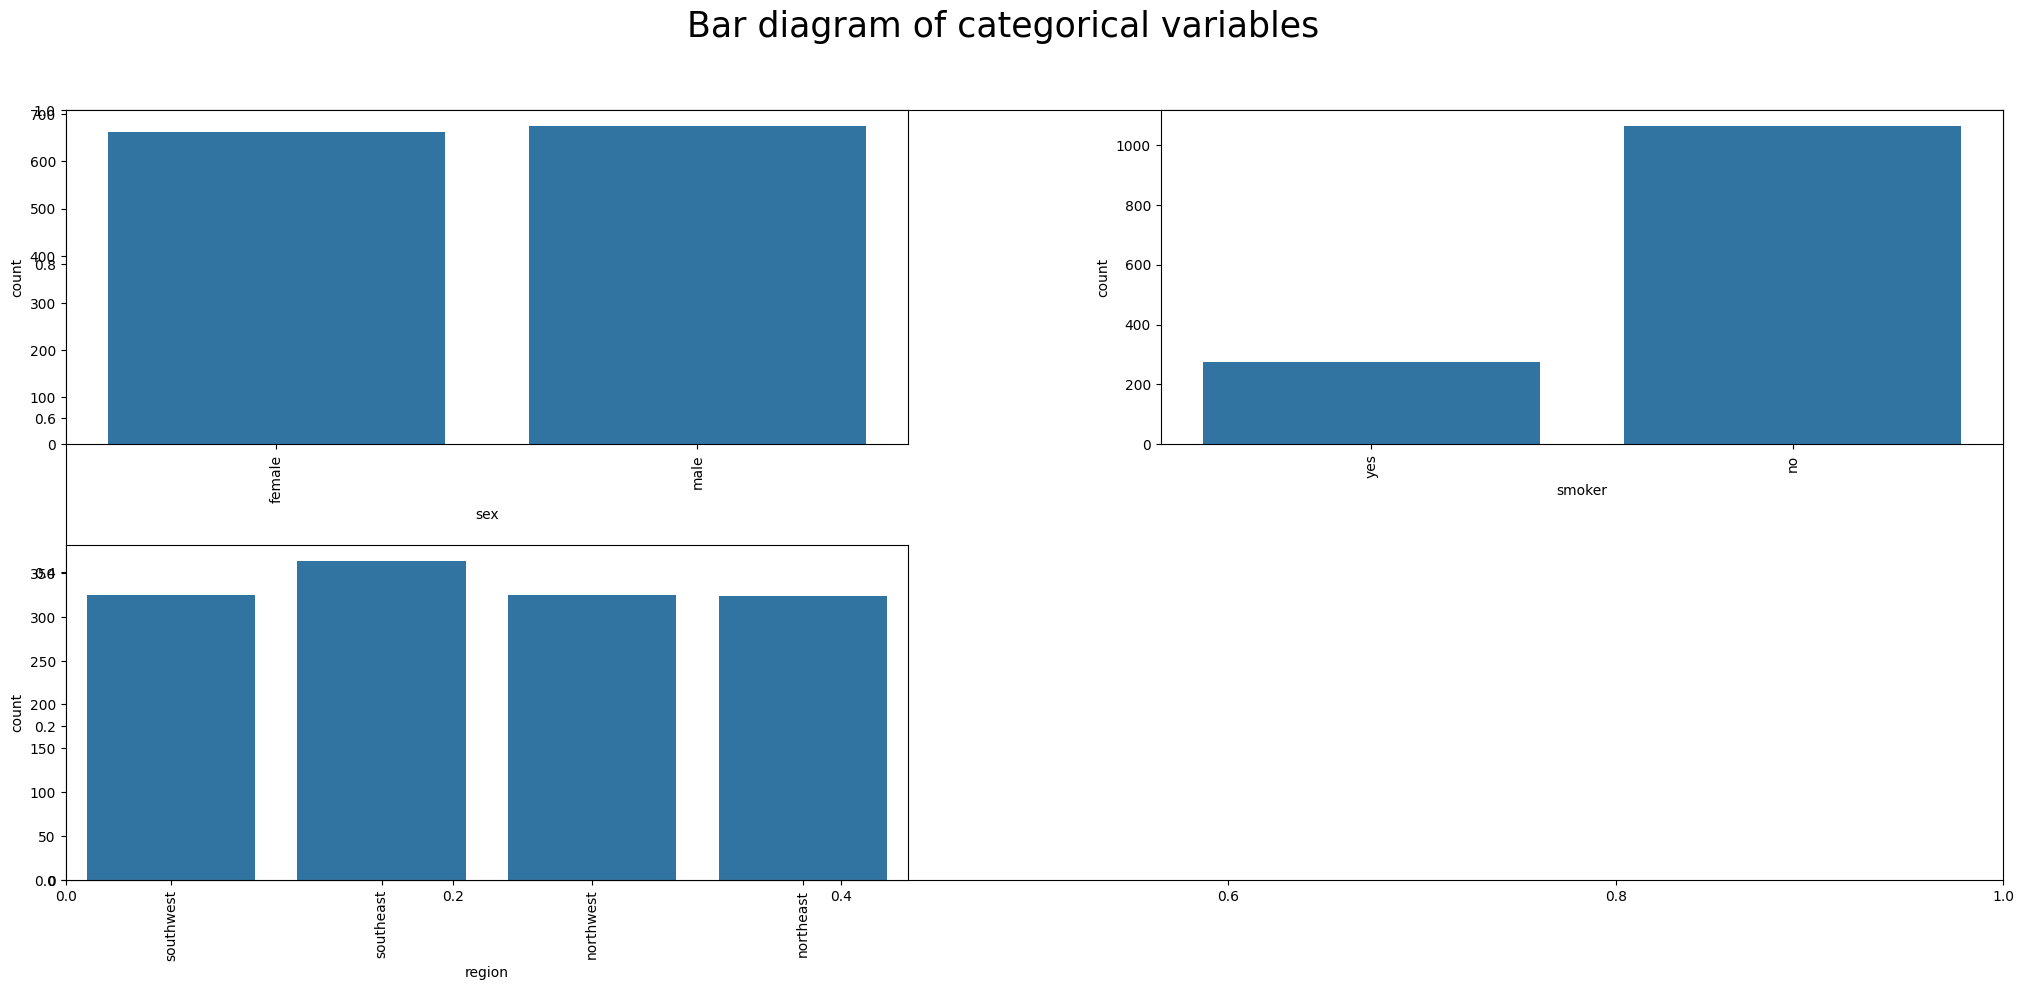

In [14]:
# Creating barchart for categorical variables
count = 1
plt.subplots(figsize=(25, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for col in cat_cols:
    plt.subplot(2, 2, count)
    plot = sns.countplot(x= col, data = df)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    count += 1
plt.suptitle('Bar diagram of categorical variables', size=25)
plt.show()

So,we see that the data on sex, region is uniformly available but there are more number of smokers than non-smokers.

Now, let's plot the histogram of the numerical variables

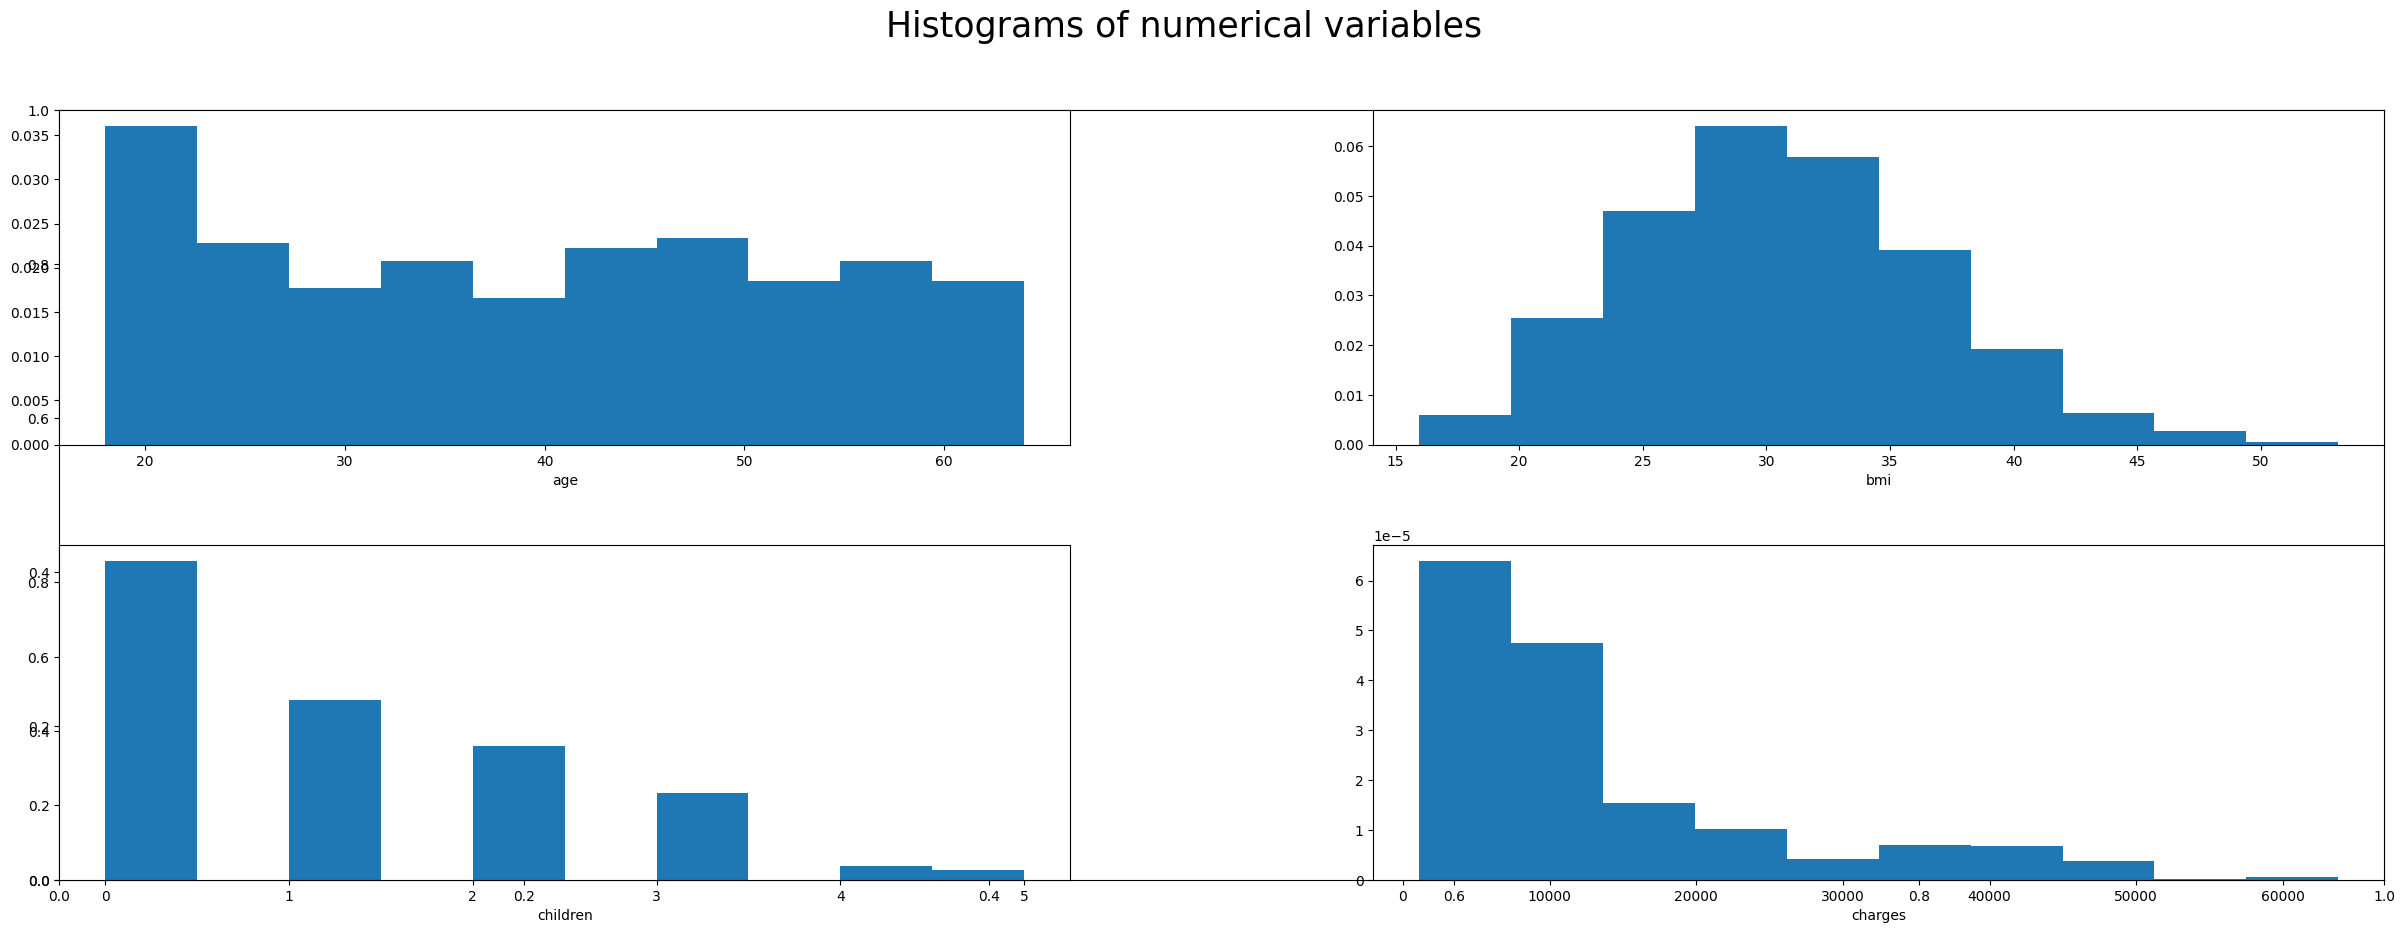

In [15]:
# Creating histograms for numerical variables
count = 1
plt.subplots(figsize=(30, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for col in num_cols:
    plt.subplot(2, 2, count)
    plot = plt.hist(x= col, data = df, density=True)
    plt.xlabel(col)
    count += 1
plt.suptitle('Histograms of numerical variables', size=25)
plt.show()

Children and charges seem to be positively skewed while 'bmi' is almost symetrically distributed. 'Age' appears to have a uniform distribution with a peak at the beginning.

Let's check the skewness and kurtosis of this variables.

In [16]:
for features in num_cols:
    print(features, df[features].skew())

age 0.05567251565299186
bmi 0.2840471105987448
children 0.9383804401702414
charges 1.5158796580240388


As seen from the graph, charges and children are positively skewed.

In [17]:
for features in num_cols:
    print(features, df[features].kurt())

age -1.2450876526418673
bmi -0.05073153135467834
children 0.2024541467168901
charges 1.6062986532967907


A negative kurtosis means that the distribution is flatter than a normal curve with the same mean and standard deviation. On the other side, Positive values of kurtosis indicate that distribution is peaked and possesses thick tails. An extreme positive kurtosis indicates a distribution where more of the numbers are located in the tails of the distribution instead of around the mean. Hence age, bmi have peaked distribution while the other two has flatter distribution.

Now let's explore the target variable more and see if we can find any other hidden features in it.

Let's plot a boxplot of charges vs sex

<Axes: xlabel='sex', ylabel='charges'>

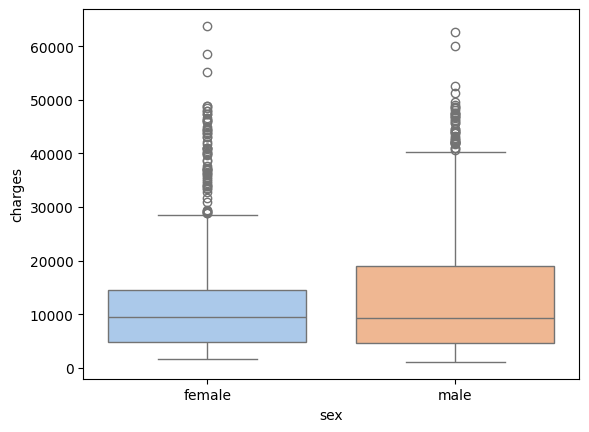

In [18]:
# Boxplot of charges vs sex
sns.boxplot(data=df, x='sex', y='charges', palette="pastel")

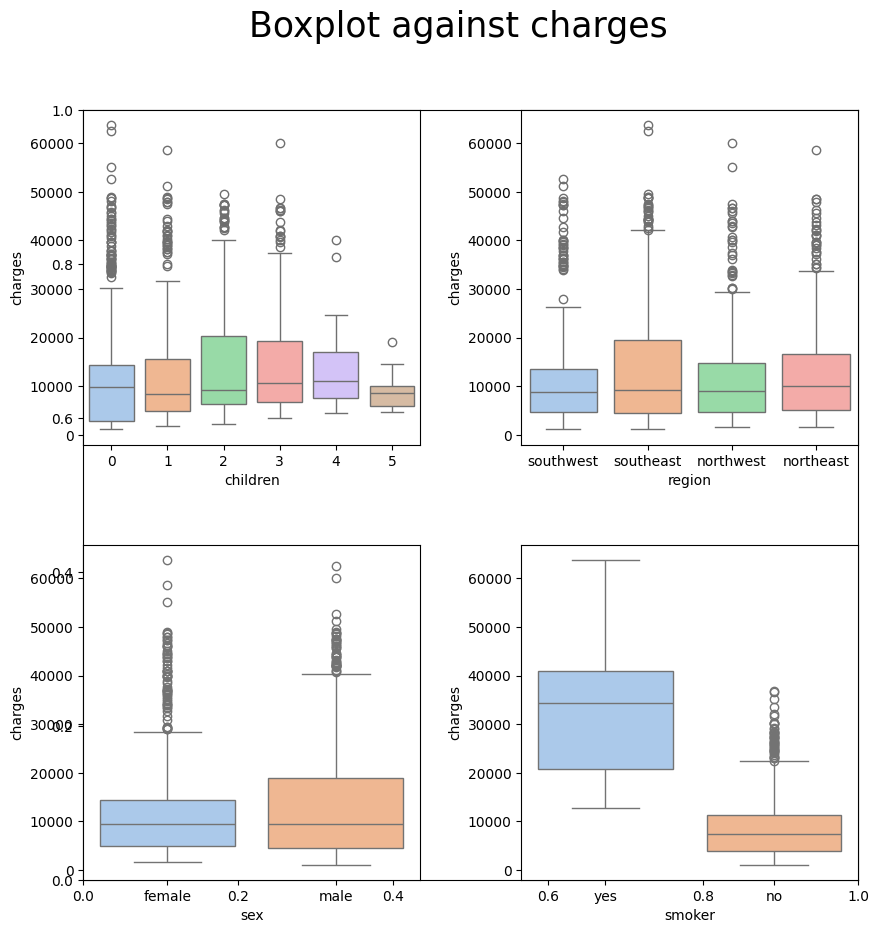

In [19]:
box_vars = cat_cols.union(['children'])
count = 1
plt.subplots(figsize=(10, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for col in box_vars:
    plt.subplot(2, 2, count)
    plot = sns.boxplot(x= col,y='charges', palette="pastel", data = df)
    plt.xlabel(col)
    count += 1
plt.suptitle('Boxplot against charges', size=25)
plt.show()

From the boxplot, it is clear that if a person is smoker, then the charge increases. Also, increase in number of children covered by health insurance increases the charge(more data on greater no of children can confirm this fact).

Now, let's do a scatterplot of the other variables against charges and see if being smoker has a effect on them

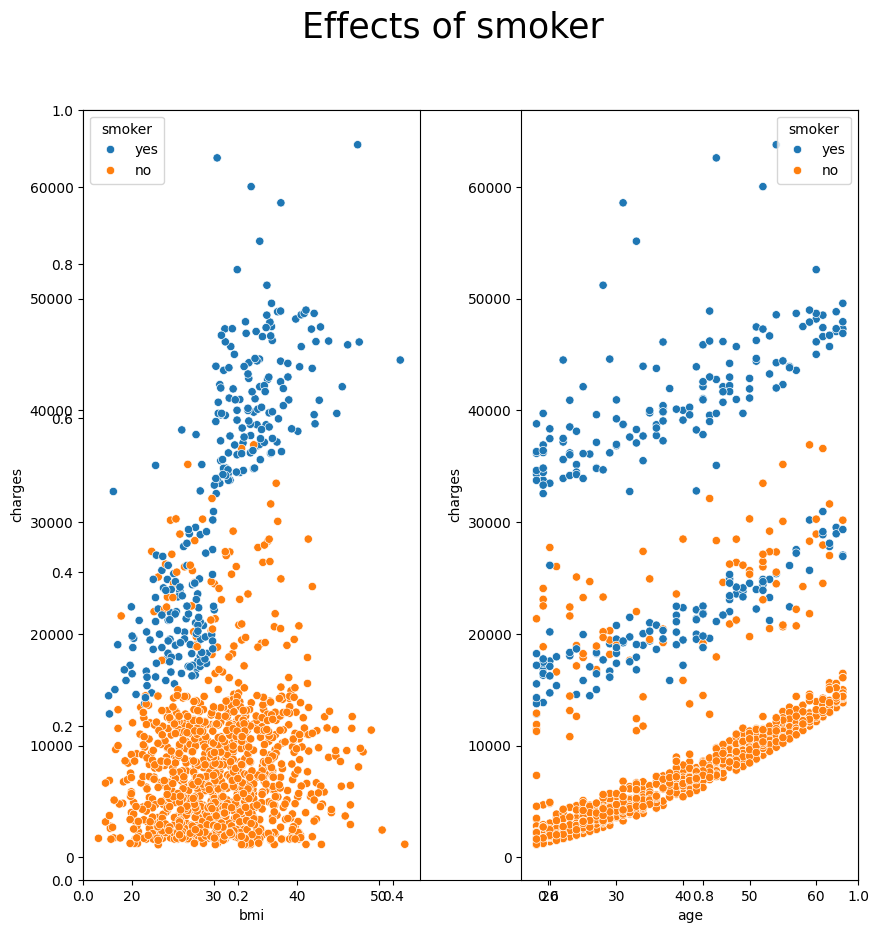

In [20]:
# Creating histograms for numerical variables
variables = ['bmi', 'age']
count = 1
plt.subplots(figsize=(10, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for col in variables:
    plt.subplot(1, 2, count)
    plot = sns.scatterplot(x= col, y='charges', data = df, hue='smoker')
    plt.xlabel(col)
    count += 1
plt.suptitle('Effects of smoker ', size=25)
plt.show()

Somkers seem to have highest impact on charges although charges increases with increase in age.

Let's see the density of charges with respect to smokers and non-smokers.

<Axes: xlabel='charges', ylabel='Density'>

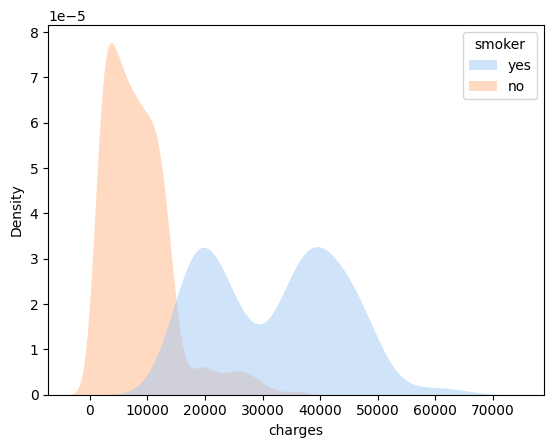

In [21]:
sns.kdeplot(data=df, x="charges", hue="smoker",fill=True, common_norm=False, palette="pastel", alpha=.5, linewidth=0)

So, smokers have the lowest charges while the charges of non-smokers is high with two modes.

Now, lets find the correlation between the features. But, to find the correlation of the categorical variables, we need to do encoding. Since none of the categorical variables are ordinal, we use One Hot Encoding

In [22]:
df = pd.get_dummies(data=df, columns = cat_cols, dtype = int)

In [23]:
# df.head()

In [24]:
# sns.pairplot(df)

<Axes: >

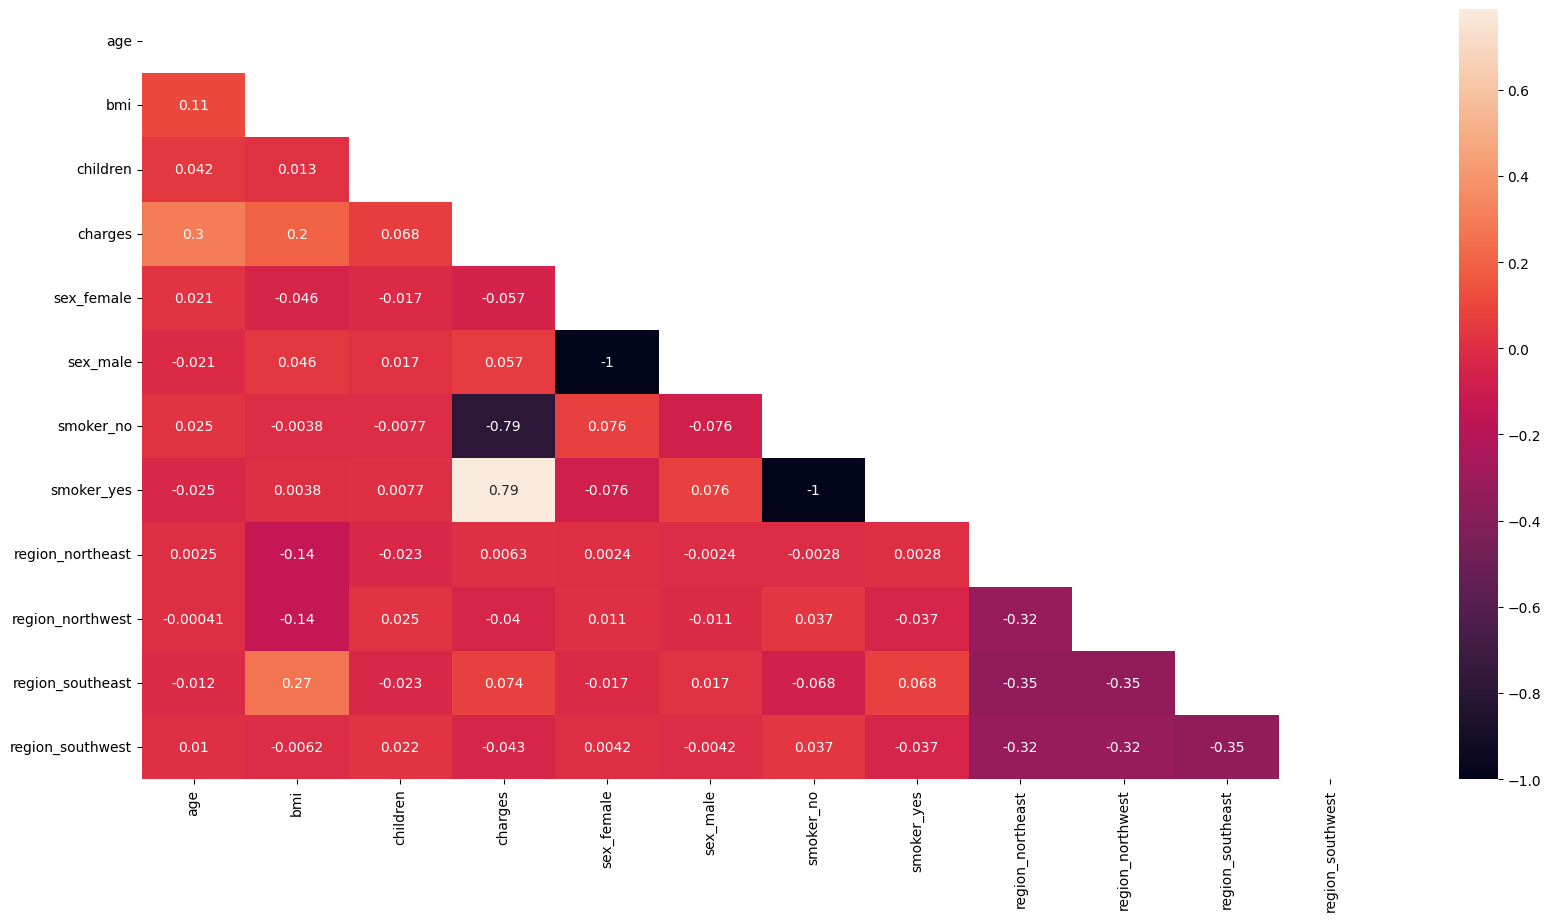

In [25]:
plt.figure(figsize=(20, 10))
corr = df.corr()
# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask = mask)

As seen earlier, smoking has the most effect on charges(correlation 0.79 if a person smokes and -0.79 if not).All the other effects are not that much effective.

Now, one-hot encoding created a few extra columns wich can be represented by the other columns(like if we only keep smoking_yes, the a value of 1 will indicate that the person smokes while a value of 0 will indicate the person is non-smoker. So, we can drop the smoking_no column. Similarly, we can drop sex_female, region_northeast from the dataframe.

In [26]:
df = df.drop(['sex_female', 'smoker_no', 'region_northeast'], axis = 1)

In [27]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

# Model Fitting

Our approach is to build a model using backward elimination and choose the model which has the lowest AIC. Then we check whether the model satisfies the assumption of regression analysis. We will build and train Linear Regression model for this problem. For starting, let’s use all available features in the model.

In [28]:
y = df['charges']
X = df.drop('charges', axis=1)

First, let us split the model into training set and testing set. We will use 80% of the data for training and the remaining 20% for testing.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=23)

## Linear Regression

Linear Regression will be implemented with automatic feature selection using ‘backward elimination’. Starting from using all the variables, the ‘backward elimination’ process will iteratively remove some of the variables and evaluate the model until it finds one with the lowest Akaike Information Criterion (AIC). Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models based on information loss. Lower AIC means better model.

In [31]:
import statsmodels.regression.linear_model as lr 

ols1 = lr.OLS(y_train, X_train).fit()

In [32]:
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              941.2
Date:                Tue, 07 May 2024   Prob (F-statistic):                        0.00
Time:                        10:05:15   Log-Likelihood:                         -10892.
No. Observations:                1070   AIC:                                  2.180e+04
Df Residuals:                    1062   BIC:                                  2.184e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                192.3801     13.001     14.797      0.000     166.869     217.891
bmi                 88.3039     20.968      4.211      0.000      47.160     129.448
children           342.0569    159.061      2.150      0.032      29.947     654.167
sex_male          -605.6333    389.686     -1.554      0.120   -1370.275     159.008
smoker_yes        2.357e+04    484.694     48.629      0.000    2.26e+04    2.45e+04
region_northwest -1943.6219    540.788     -3.594      0.000   -3004.756    -882.487
region_southeast -1527.7111    562.839     -2.714      0.007   -2632.113    -423.309
region_southwest -2479.2253    557.926     -4.444      0.000   -3573.988   -1384.463
==============================================================================
Omnibus:                      220.569   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              510.501
Skew:                           1.119   Prob(JB):                    1.40e-111
Kurtosis:                       5.538   Cond. No.                         206.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The value of Adjusted R-squared (uncentered) is 0.874, i.e., 87.4% of variability is expressed by the model.We will try to improve the model by removing some variables from the model.

In [33]:
residue1 = sum(y_test - ols1.predict(X_test))
sq_error1 = (residue1)**2
rmse1 = (sq_error1)**0.5

rmse1

171279.99677258477

The variable 'sex_male' has p-value 0.12. So, we first remove this variable and refit the model.

In [34]:
X_train = X_train.drop('sex_male', axis=1)

In [35]:
X_test = X_test.drop('sex_male', axis=1)

In [36]:
ols2 = lr.OLS(y_train, X_train).fit()

In [37]:
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              1074.
Date:                Tue, 07 May 2024   Prob (F-statistic):                        0.00
Time:                        10:05:15   Log-Likelihood:                         -10893.
No. Observations:                1070   AIC:                                  2.180e+04
Df Residuals:                    1063   BIC:                                  2.184e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                191.4417     12.996     14.731      0.000     165.941     216.942
bmi                 81.1333     20.468      3.964      0.000      40.971     121.296
children           336.1557    159.122      2.113      0.035      23.927     648.384
smoker_yes         2.35e+04    482.902     48.664      0.000    2.26e+04    2.44e+04
region_northwest -1970.2509    540.876     -3.643      0.000   -3031.557    -908.944
region_southeast -1546.7979    563.079     -2.747      0.006   -2651.671    -441.925
region_southwest -2511.1545    557.919     -4.501      0.000   -3605.902   -1416.407
==============================================================================
Omnibus:                      221.457   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              514.364
Skew:                           1.122   Prob(JB):                    2.03e-112
Kurtosis:                       5.550   Cond. No.                         206.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjusted-R2 value remains same but the F-statistic increased.

We will now calculate the MSE of both the models and see if it has improved. 

In [38]:
residue2 = sum(y_test - ols2.predict(X_test))
sq_error2 = (residue1)**2
rmse2 = (sq_error2)**0.5

rmse2

171279.99677258477

In [39]:
rmse2-rmse1

0.0

So, the root mean squared error remained same. So, we can use the second model as this has less number of variables and also the F-statistic is higher.

## Polynomial regression

We can improve our model by ‘feature engineering’, specifically, by making new features that captures the interactions between existing features. This is called polynomial regression. We will use degree 2.

We will have to again take the train-test split as 'sex_male' was dropped from the variable for fitting model-2

In [40]:
X['bmi-squared'] = X['bmi']**2

In [41]:
X = X.drop('bmi', axis = 1)

In [42]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X, y,test_size = 0.2, random_state=23)

In [43]:
X_train_poly = X_train_poly.drop('sex_male', axis = 1)
X_test_poly = X_test_poly.drop('sex_male', axis=1)

In [44]:
poly_reg = lr.OLS(y_train_poly, X_train_poly).fit()

In [45]:
poly_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              1116.
Date:                Tue, 07 May 2024   Prob (F-statistic):                        0.00
Time:                        10:05:15   Log-Likelihood:                         -10875.
No. Observations:                1070   AIC:                                  2.176e+04
Df Residuals:                    1063   BIC:                                  2.180e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                181.5149     10.833     16.755      0.000     160.258     202.772
children           307.6389    155.161      1.983      0.048       3.183     612.095
smoker_yes        2.348e+04    472.483     49.692      0.000    2.26e+04    2.44e+04
region_northwest -2001.9236    513.796     -3.896      0.000   -3010.094    -993.754
region_southeast -2184.9402    540.314     -4.044      0.000   -3245.142   -1124.738
region_southwest -2744.6714    531.042     -5.168      0.000   -3786.680   -1702.663
bmi-squared          3.2308      0.444      7.272      0.000       2.359       4.103
==============================================================================
Omnibus:                      227.056   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.074
Skew:                           1.154   Prob(JB):                    4.30e-114
Kurtosis:                       5.527   Cond. No.                     4.04e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
poly_residue = sum(y_test - poly_reg.predict(X_test_poly))
poly_sq_error = (poly_residue)**2
poly_rmse = (poly_sq_error)**0.5

poly_rmse

162424.2119246257

In [47]:
poly_rmse-rmse2

-8855.784847959061

So, less rmse.Hence the polynomial regression is better.

In [48]:
poly_reg.params

age                   181.514905
children              307.638886
smoker_yes          23478.716428
region_northwest    -2001.923647
region_southeast    -2184.940233
region_southwest    -2744.671415
bmi-squared             3.230752
dtype: float64

# Model Evaluation

## Normality of residuals

Text(0.5, 0.98, 'Residuals for polynomial regression ')

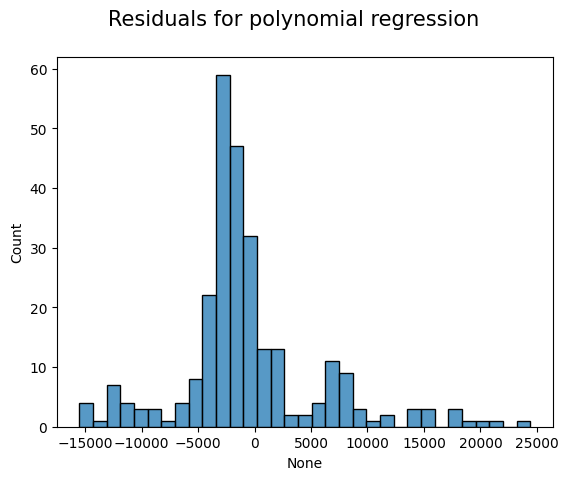

In [49]:
sns.histplot(x=(y_test - poly_reg.predict(X_test_poly)))
plt.suptitle('Residuals for polynomial regression ', size=15)


Text(0.5, 0.98, 'Residuals for linear regression ')

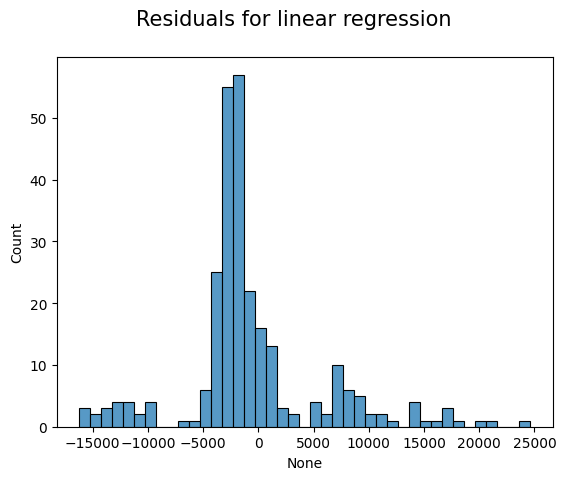

In [50]:
sns.histplot(x=(y_test - ols2.predict(X_test)))
plt.suptitle('Residuals for linear regression ', size=15)

## Shapiro-Wilk test

1. H0: Residuals are normally distributed
2. H1: Residuals are not normally distributed

In [51]:
from scipy.stats import shapiro
print('Shapiro-Wilk test for polynomial regression')
shapiro((y_test - poly_reg.predict(X_test_poly)))

Shapiro-Wilk test for polynomial regression


ShapiroResult(statistic=0.883733868598938, pvalue=1.9328233403972245e-13)

In [52]:

print('Shapiro-Wilk test for linear regression')
shapiro((y_test - ols2.predict(X_test)))

Shapiro-Wilk test for linear regression


ShapiroResult(statistic=0.8631665706634521, pvalue=1.0823874043960121e-14)

Since p-value is below alpha (0.05), reject H0. Hence, residuals are not normally distributed.

## Homoscedasticity of data

### Breusch-Pagan hypothesis.

1. H0: Homoscedasticity
2. H1: Heteroscedasticity

In [53]:
import scipy
test = scipy.stats.jarque_bera(poly_reg.resid)
test

SignificanceResult(statistic=522.073953134125, pvalue=4.296170455997701e-114)

### VIF

In [54]:
df['c'] = 1

In [55]:
df = df.drop(['charges', 'sex_male'], axis=1)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = [variance_inflation_factor(df, i) for i in range(df.shape[1])]

In [57]:
print('VIF for linear regression:')
for i in range(len(df.columns)):
    print(df.columns[i], vif[i])

VIF for linear regression:
age 1.0161876456574646
bmi 1.1041974319208
children 1.0037140908062543
smoker_yes 1.0063687256331353
region_northwest 1.5187967341932807
region_southeast 1.6522093958656765
region_southwest 1.5293914673370588
c 34.90110732578775


In [58]:

df['bmi_squared'] = df['bmi']**2


In [59]:
df = df.drop(['bmi'], axis=1)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = [variance_inflation_factor(df, i) for i in range(df.shape[1])]


In [61]:
print('VIF for polynomial regression:\n')
for i in range(len(df.columns)):
    print(df.columns[i], vif[i])

VIF for polynomial regression:

age 1.0142362351379695
children 1.003730785039018
smoker_yes 1.0063209246994307
region_northwest 1.5188769157828363
region_southeast 1.654094751550785
region_southwest 1.527526262478329
c 17.233705325275853
bmi_squared 1.107258173866125


# Conclusion

So, the adjusted R2 of both the polynomial regression and linear regression are almost same.But the RMSE and F-statistic of polynomial regression is better. But, in fitting these models the assumption of normality is violated(maybe the small size of the dataset causes this problem).
This study and analysis shows how we can use different predictive analysis like regression analysis to help Insurance Companies to predict better values for amount of coverage in medical bills in future and also compare between two different models.